In [18]:
# Required libraries
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.preprocessing as preprocessing
import pandas as pd
import numpy as np
from sklearn import metrics

In [13]:
#read dataset
dataset = pd.read_csv('school_grades_dataset.csv')

#Summarise the dataset

def summarise(df):
    for column in dataset.columns:
        print(column)
        if df.dtypes[column] == np.object:
            print("{}\n".format(df[column].value_counts()))
        else:
            print("{}\n".format(df[column].describe()))
        
        
summarise(dataset)

school
GP    423
MS    226
Name: school, dtype: int64

sex
F    383
M    266
Name: sex, dtype: int64

age
count    649.000000
mean      16.744222
std        1.218138
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64

address
U    452
R    197
Name: address, dtype: int64

famsize
GT3    457
LE3    192
Name: famsize, dtype: int64

Pstatus
T    569
A     80
Name: Pstatus, dtype: int64

Medu
count    649.000000
mean       2.514638
std        1.134552
min        0.000000
25%        2.000000
50%        2.000000
75%        4.000000
max        4.000000
Name: Medu, dtype: float64

Fedu
count    649.000000
mean       2.306626
std        1.099931
min        0.000000
25%        1.000000
50%        2.000000
75%        3.000000
max        4.000000
Name: Fedu, dtype: float64

Mjob
other       258
services    136
at_home     135
teacher      72
health       48
Name: Mjob, dtype: int64

Fjob
other       367
services    181
at_h

In [17]:
# Encode the data using LabelEncoder

def encodeData(df):
    result = df.copy()
    encoders = {}
    for column in df.columns:
        if df.dtypes[column] == np.object:
            encoders[column] = preprocessing.LabelEncoder()
            result[column] = encoders[column].fit_transform(result[column])
    return result, encoders

encoded_data, _ = encodeData(dataset)

print(encoded_data.head())

   school  sex  age  address  famsize  Pstatus  Medu  Fedu  Mjob  Fjob  ...  \
0       0    0   18        1        0        0     4     4     0     4  ...   
1       0    0   17        1        0        1     1     1     0     2  ...   
2       0    0   15        1        1        1     1     1     0     2  ...   
3       0    0   15        1        0        1     4     2     1     3  ...   
4       0    0   16        1        0        1     3     3     2     2  ...   

   famrel  freetime  goout  Dalc  Walc  health  absences  G1  G2  G3  
0       4         3      4     1     1       3         4   0  11  11  
1       5         3      3     1     1       3         2   9  11  11  
2       4         3      2     2     3       3         6  12  13  12  
3       3         2      2     1     1       5         0  14  14  14  
4       4         3      2     1     2       5         0  11  13  13  

[5 rows x 33 columns]


In [28]:
# Spliting the dataset

def getFeatures(df):
    features = []
    for column in df.columns:
        if column != 'G3':
            features.append(column)
    return features, 'G3'

features, output = getFeatures(encoded_data)

features = encoded_data[features]
output = encoded_data[output]

features_learn, features_test, output_learn, output_test = train_test_split(features, output, test_size=0.10, random_state=1)


<class 'numpy.ndarray'>
<class 'pandas.core.series.Series'>
Mean Absolute error =  0.775863775641657


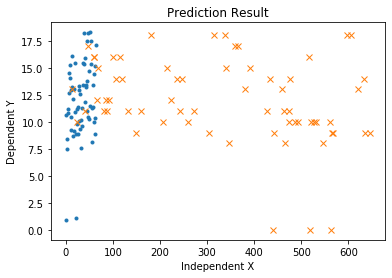

In [33]:
# Initiate the learning

linreq = LinearRegression()
linreq.fit(features_learn, output_learn)

# Testing
output_predicted = linreq.predict(features_test)
print(type(output_predicted))
print(type(output_test))
print('Mean Absolute error = ', metrics.mean_absolute_error(output_test, output_predicted))

plt.plot(output_predicted, '.', output_test, 'x')
plt.xlabel('Independent X')
plt.ylabel('Dependent Y')
plt.title('Prediction Result')
plt.show()